Loaded real distance matrix
Số thành phố: 127
Ví dụ khoảng cách [0][1]: 21.48

=== RLGA - Số người bán hàng (m) = 1 ===
Gen 0: Best max route length = 1591.13, Pc = 0.70, Pm = 0.05
Gen 20: Best max route length = 1349.39, Pc = 0.70, Pm = 0.05


C:\Users\vthuy\AppData\Local\Temp\ipykernel_30664\112860445.py:143: RuntimeWarning: invalid value encountered in scalar divide
  reward = (self.last_best_fitness - best_fitness) / (abs(self.last_best_fitness) + 1e-6)


Gen 40: Best max route length = 1319.83, Pc = 0.70, Pm = 0.05
Gen 60: Best max route length = 1319.83, Pc = 0.70, Pm = 0.05
Gen 80: Best max route length = 1319.83, Pc = 0.70, Pm = 0.05
Gen 100: Best max route length = 1319.83, Pc = 0.70, Pm = 0.05
Gen 120: Best max route length = 1319.83, Pc = 0.70, Pm = 0.05
Gen 140: Best max route length = 1319.83, Pc = 0.70, Pm = 0.05
Gen 160: Best max route length = 1319.83, Pc = 0.70, Pm = 0.05
Gen 180: Best max route length = 1319.83, Pc = 0.70, Pm = 0.05
Gen 200: Best max route length = 1319.83, Pc = 0.70, Pm = 0.05
Gen 220: Best max route length = 1319.83, Pc = 0.70, Pm = 0.05
Gen 240: Best max route length = 1319.83, Pc = 0.70, Pm = 0.05
Gen 260: Best max route length = 1319.83, Pc = 0.70, Pm = 0.05
Gen 280: Best max route length = 1319.83, Pc = 0.70, Pm = 0.05
Tổng quãng đường: 1319.83
Chiều dài route dài nhất (Max route length): 1319.83
Chênh lệch giữa các route (Balance metric): 0.00
Thời gian thực thi: 2.9108 giây
Số vòng lặp cần thiết để

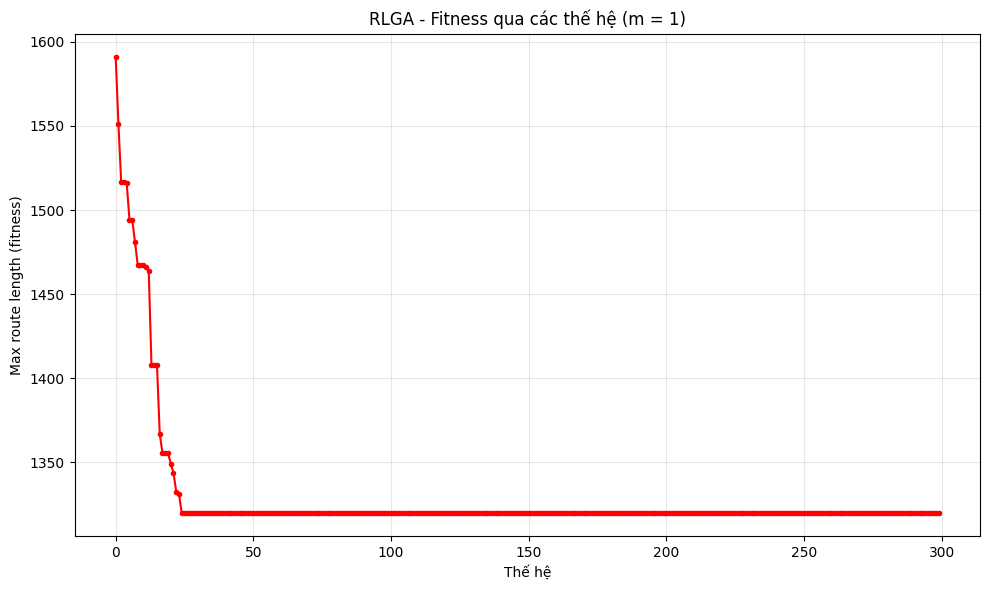


=== RLGA - Số người bán hàng (m) = 2 ===
Gen 0: Best max route length = 850.09, Pc = 0.70, Pm = 0.05
Gen 20: Best max route length = 741.51, Pc = 0.70, Pm = 0.05
Gen 40: Best max route length = 730.28, Pc = 0.70, Pm = 0.05
Gen 60: Best max route length = 730.28, Pc = 0.70, Pm = 0.05
Gen 80: Best max route length = 730.28, Pc = 0.70, Pm = 0.05
Gen 100: Best max route length = 730.28, Pc = 0.70, Pm = 0.05
Gen 120: Best max route length = 730.28, Pc = 0.70, Pm = 0.05
Gen 140: Best max route length = 730.28, Pc = 0.70, Pm = 0.05
Gen 160: Best max route length = 730.28, Pc = 0.70, Pm = 0.05
Gen 180: Best max route length = 730.28, Pc = 0.90, Pm = 0.05
Gen 200: Best max route length = 730.28, Pc = 0.70, Pm = 0.05
Gen 220: Best max route length = 730.28, Pc = 0.70, Pm = 0.05
Gen 240: Best max route length = 730.28, Pc = 0.70, Pm = 0.05
Gen 260: Best max route length = 730.28, Pc = 0.70, Pm = 0.05
Gen 280: Best max route length = 730.28, Pc = 0.70, Pm = 0.05
Tổng quãng đường: 1458.11
Chiều dà

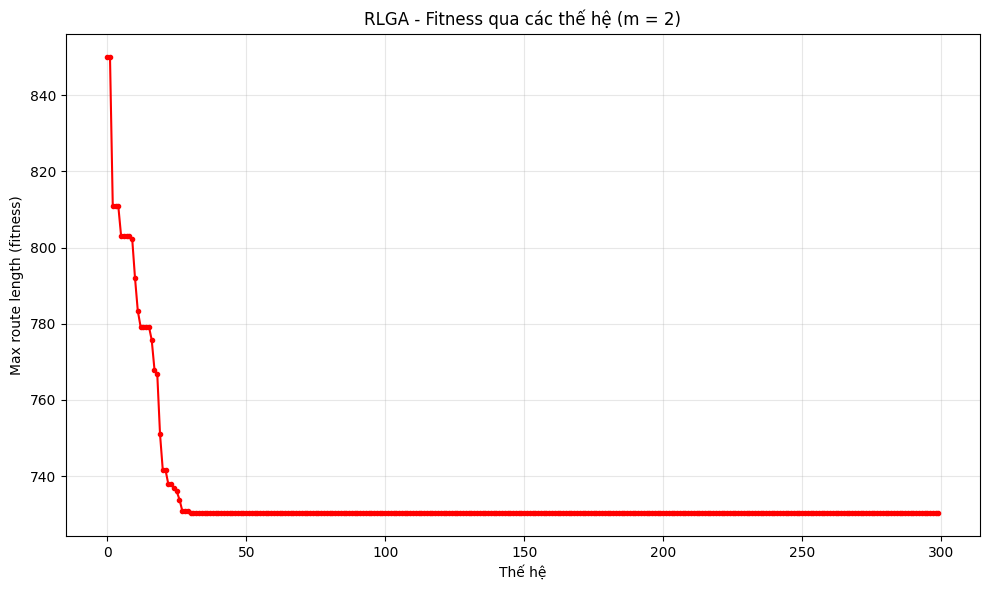


=== RLGA - Số người bán hàng (m) = 3 ===
Gen 0: Best max route length = 605.54, Pc = 0.70, Pm = 0.05
Gen 20: Best max route length = 526.51, Pc = 0.70, Pm = 0.05
Gen 40: Best max route length = 526.51, Pc = 0.70, Pm = 0.05
Gen 60: Best max route length = 526.51, Pc = 0.70, Pm = 0.05
Gen 80: Best max route length = 526.51, Pc = 0.70, Pm = 0.05
Gen 100: Best max route length = 526.51, Pc = 0.70, Pm = 0.05
Gen 120: Best max route length = 526.51, Pc = 0.70, Pm = 0.05
Gen 140: Best max route length = 526.51, Pc = 0.70, Pm = 0.05
Gen 160: Best max route length = 526.51, Pc = 0.70, Pm = 0.05
Gen 180: Best max route length = 526.51, Pc = 0.70, Pm = 0.05
Gen 200: Best max route length = 526.51, Pc = 0.70, Pm = 0.05
Gen 220: Best max route length = 526.51, Pc = 0.70, Pm = 0.05
Gen 240: Best max route length = 526.51, Pc = 0.70, Pm = 0.05
Gen 260: Best max route length = 526.51, Pc = 0.70, Pm = 0.05
Gen 280: Best max route length = 526.51, Pc = 0.70, Pm = 0.05
Tổng quãng đường: 1566.75
Chiều dà

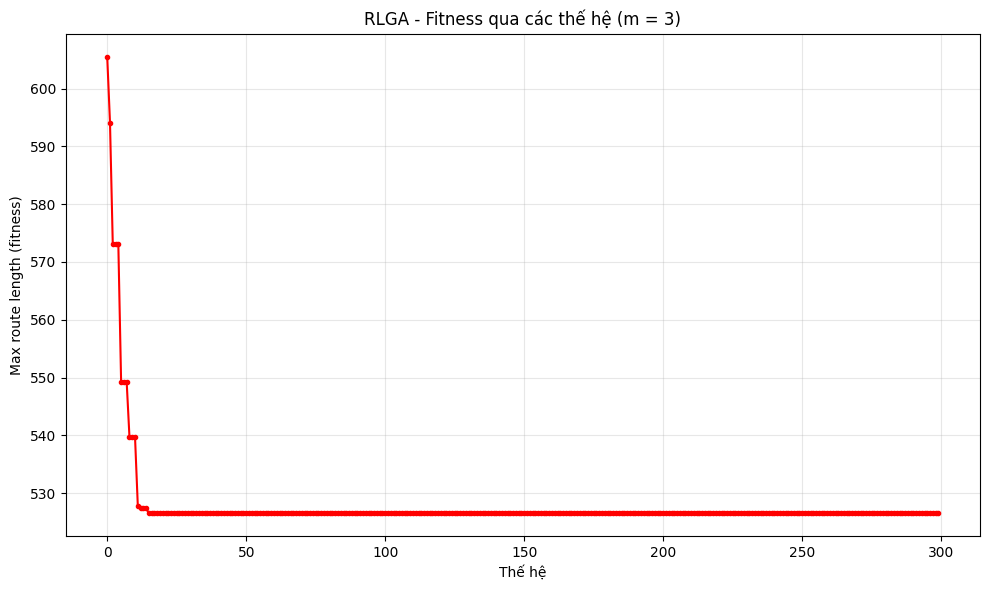

In [ ]:
# Genetic Algorithm for mTSP using the flow from Electronics 2024
import sys
sys.path.append('../src') 
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import time
import random
from typing import List, Tuple

class RLGA_mTSP:
    def __init__(self, distance_matrix: np.ndarray, m: int = 3,
                 pop_size: int = 100, generations: int = 300,
                 epsilon: float = 0.1, epsilon_decay: float = 0.99):
        
        self.distance_matrix = distance_matrix
        self.n_cities = len(distance_matrix)
        self.m = m
        self.pop_size = pop_size
        self.generations = generations
        self.epsilon = epsilon
        self.epsilon_decay = epsilon_decay
        self.depot = 0

        self.crossover_rates = [0.7, 0.8, 0.9]
        self.mutation_rates = [0.05, 0.1, 0.15]
        self.Q = {}
        self.current_pc = 0.8
        self.current_pm = 0.1

        self.last_best_fitness = float('inf')

    def initialize_population(self) -> List[List[int]]:
        cities = list(range(1, self.n_cities))
        return [random.sample(cities, len(cities)) for _ in range(self.pop_size)]

    def decode_solution(self, chromosome: List[int]) -> List[List[int]]:
        routes = [[] for _ in range(self.m)]
        for i, city in enumerate(chromosome):
            routes[i % self.m].append(city)
        return routes

    def calculate_fitness(self, chromosome: List[int]) -> float:
        routes = self.decode_solution(chromosome)
        route_distances = [
            sum(self.distance_matrix[route[i]][route[i+1]] for i in range(len(route)-1))
            if len(route) > 1 else 0
            for route in [[self.depot] + r + [self.depot] for r in routes]
        ]
        return max(route_distances) if route_distances else float('inf')

    def tournament_selection(self, population: List[List[int]], fitness: List[float]) -> List[int]:
        i, j, k = random.sample(range(len(population)), 3)
        best_idx = min([i, j, k], key=lambda idx: fitness[idx])
        return population[best_idx].copy()

    def partially_mapped_crossover(self, p1: List[int], p2: List[int]) -> Tuple[List[int], List[int]]:
        if random.random() > self.current_pc:
            return p1.copy(), p2.copy()

        size = len(p1)
        cx_point1, cx_point2 = sorted(random.sample(range(size), 2))
        
        def pmx(parent1, parent2):
            child = [None] * size
            child[cx_point1:cx_point2] = parent1[cx_point1:cx_point2]
            for i in range(cx_point1, cx_point2):
                if parent2[i] not in child:
                    val = parent2[i]
                    idx = i
                    while True:
                        val = parent1[idx]
                        idx = parent2.index(val)
                        if child[idx] is None:
                            child[idx] = parent2[i]
                            break
            for i in range(size):
                if child[i] is None:
                    child[i] = parent2[i]
            return child

        return pmx(p1, p2), pmx(p2, p1)

    def index_mutation(self, chromosome: List[int]) -> List[int]:
        if random.random() < self.current_pm:
            i = random.randint(0, len(chromosome) - 1)
            available_values = [v for v in range(1, self.n_cities) if v not in chromosome or chromosome.index(v) == i]
            if available_values:
                chromosome[i] = random.choice(available_values)
        return chromosome

    def update_q(self, state: str, action: Tuple[float, float], reward: float):
        alpha = 0.1
        if state not in self.Q:
            self.Q[state] = { (pc, pm): 0.0 for pc in self.crossover_rates for pm in self.mutation_rates }
        self.Q[state][action] += alpha * (reward - self.Q[state][action])

    def select_action(self, state: str) -> Tuple[float, float]:
        if state not in self.Q:
            self.Q[state] = { (pc, pm): 0.0 for pc in self.crossover_rates for pm in self.mutation_rates }
        if random.random() < self.epsilon:
            return random.choice(self.crossover_rates), random.choice(self.mutation_rates)
        return max(self.Q[state].items(), key=lambda x: x[1])[0]

    def get_state(self, fitness_list: List[float]) -> str:
        diversity = np.std(fitness_list)
        improvement = self.last_best_fitness - min(fitness_list)
        diversity_level = "high" if diversity > np.mean(fitness_list) * 0.1 else "low"
        improvement_level = "good" if improvement > 0 else "poor"
        return f"{diversity_level}_{improvement_level}"

    def run(self):
        population = self.initialize_population()
        best_solution = None
        best_fitness = float('inf')
        fitness_history = []

        for gen in range(self.generations):
            fitness_scores = [self.calculate_fitness(ind) for ind in population]
            best_idx = np.argmin(fitness_scores)
            if fitness_scores[best_idx] < best_fitness:
                best_fitness = fitness_scores[best_idx]
                best_solution = population[best_idx].copy()

            fitness_history.append(best_fitness)
            state = self.get_state(fitness_scores)
            self.current_pc, self.current_pm = self.select_action(state)

            new_population = []
            elite = population[best_idx].copy()
            new_population.append(elite)

            while len(new_population) < self.pop_size:
                p1 = self.tournament_selection(population, fitness_scores)
                p2 = self.tournament_selection(population, fitness_scores)
                c1, c2 = self.partially_mapped_crossover(p1, p2)
                c1 = self.index_mutation(c1)
                c2 = self.index_mutation(c2)
                new_population.extend([c1, c2])

            population = new_population[:self.pop_size]

            reward = (self.last_best_fitness - best_fitness) / (abs(self.last_best_fitness) + 1e-6)
            self.update_q(state, (self.current_pc, self.current_pm), reward)
            self.last_best_fitness = best_fitness
            self.epsilon *= self.epsilon_decay

            if gen % 20 == 0:
                print(f"Gen {gen}: Best max route length = {best_fitness:.2f}, Pc = {self.current_pc:.2f}, Pm = {self.current_pm:.2f}")

        routes = self.decode_solution(best_solution)
        route_distances = [
            sum(self.distance_matrix[r[i]][r[i+1]] for i in range(len(r)-1))
            for r in [[self.depot] + route + [self.depot] for route in routes]
        ]
        total_distance = sum(route_distances)
        balance_metric = max(route_distances) - min(route_distances) if route_distances else 0

        return routes, total_distance, best_fitness, balance_metric, fitness_history
    
def detect_convergence(fitness_list, window=5, threshold=1e-3):
    """Detect convergence in fitness evolution"""
    if len(fitness_list) < window:
        return len(fitness_list)
    for i in range(len(fitness_list) - window):
        if abs(fitness_list[i] - fitness_list[i + window]) < threshold:
            return i + window
    return len(fitness_list)


# Load real distance matrix or create example
try:
    distance_df = pd.read_csv('../data/HN_distance_matrix.csv', index_col=0)
    distance_matrix = distance_df.values
    print("Loaded real distance matrix")
except:
    # Fallback to example matrix
    n_cities = 127
    rng = np.random.default_rng(42)
    distance_matrix = rng.uniform(10, 100, size=(n_cities, n_cities))
    distance_matrix = (distance_matrix + distance_matrix.T) / 2
    np.fill_diagonal(distance_matrix, 0)
    print("Using example distance matrix")

print("Số thành phố:", distance_matrix.shape[0])
print("Ví dụ khoảng cách [0][1]:", distance_matrix[0][1])


# Run experiments for different numbers of salesmen
for m in range(1, 4):
    print(f"\n=== RLGA - Số người bán hàng (m) = {m} ===")

    start_time = time.time()

    rlga = RLGA_mTSP(distance_matrix, m=m, pop_size=100, generations=300)
    routes, total_distance, max_route, balance_metric, fitness_per_generation = rlga.run()

    end_time = time.time()
    exec_time = end_time - start_time

    route_distances = []
    for route in routes:
        if len(route) > 0:
            full_route = [0] + route + [0]
            distance = sum(distance_matrix[full_route[i]][full_route[i+1]] 
                           for i in range(len(full_route)-1))
            route_distances.append(distance)
        else:
            route_distances.append(0)

    balance_metric = max(route_distances) - min(route_distances) if route_distances else 0

    # Convergence analysis
    converged_gen = detect_convergence(fitness_per_generation)
    convergence_speed = (fitness_per_generation[0] - fitness_per_generation[-1]) / converged_gen if converged_gen > 0 else 0

    # Print results - all required metrics
    print(f"Tổng quãng đường: {total_distance:.2f}")
    print(f"Chiều dài route dài nhất (Max route length): {max_route:.2f}")
    print(f"Chênh lệch giữa các route (Balance metric): {balance_metric:.2f}")
    print(f"Thời gian thực thi: {exec_time:.4f} giây")
    print(f"Số vòng lặp cần thiết để hội tụ: {converged_gen}")
    print(f"Tốc độ hội tụ: {convergence_speed:.4f} đơn vị/gen")

    # Display individual routes
    for i, route in enumerate(routes):
        if len(route) > 0:
            full_route = [0] + route + [0]
            print(f" - Tuyến {i+1} ({route_distances[i]:.2f}): {full_route}")
        else:
            print(f" - Tuyến {i+1} (0.00): [0]")

    # Plot fitness evolution
    plt.figure(figsize=(10, 6))
    plt.plot(fitness_per_generation, marker='o', linestyle='-', color='red', markersize=3)
    plt.title(f"RLGA - Fitness qua các thế hệ (m = {m})")
    plt.xlabel("Thế hệ")
    plt.ylabel("Max route length (fitness)")
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()